# **Classical interval estimation, limits, systematics Lecture 2 : exercises notebook**

This is the companion notebook to lecture 1 in the _Classical interval estimation, limits and systematics_ course, covering the following topics:

1. Parameter estimation using likelihood methods
3. Maximum likelihood in the Gaussian case and chi2
4. Hypothesis testing basics

First perform the usual imports:

In [11]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt

## 1. Parameter estimation using likelihood methods

In the previous lecture, we have applied hypothesis testing to a bin-counting experiment:

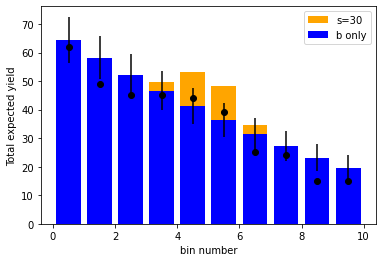

In [14]:
nbins = 10
x = np.linspace(0.5, nbins - 0.5, nbins)

# The background follows a linear shape
b_yields = np.array([ (1 - i/2/nbins) for i in range(0, nbins) ])
b_yields *= b_yields/np.sum(b_yields)

# The signal shape is a peak
s_yields = np.zeros(nbins)
s_yields[3:7] = [ 0.1, 0.4, 0.4, 0.1 ]

# Now generate some data for s=10
s = 10
b = 500
s_and_b = s*s_yields + b*b_yields
b_only = b*b_yields
np.random.seed(1) # make sure we always generate the same
data = [ np.random.poisson(s*s_yield + b*b_yield) for s_yield, b_yield in zip(s_yields, b_yields) ]

# And define the model for s=30
s30_and_b = 30*s_yields + b*b_yields

# And finally plot everything
plt.bar(x, s30_and_b, color='orange', label='s=30')
plt.bar(x, b_only, color='b', yerr=np.sqrt(b_only), label='b only')
plt.scatter(x, data, zorder=10, color='k')
plt.xlabel('bin number')
plt.ylabel('Total expected yield')
plt.legend();

There are some fluctuations in the data, but it seems that the $s$ is fairly small compared to the $s=30$ shown in orange (note that we cheated and generated the data for $s=10$, so this is not unexpected!). We can use the tools defined in the previous lecture to find the best-fit $s$:

In [15]:
# ==> First define the log-likelihood function lambda = -2 log L as in the previous class 
def lambda_s(s_hypo, data) :
    pass # Your code here to compute the log-likelihood of the model with s=s_hypo for the provided dataset

from scipy.optimize import minimize_scalar

# ==> Minimize it for the observed data, using minimize_scalar as before (use a python lambda construct to set dataset=data in lambda_s)


We are going to compute confidence intervals on the a signal yield $s$ use the likelihood-based discriminant
$$
t(s) = -2 \log \frac{L(s)}{L(\hat{s})}
$$
following the same principle as for discovery. Define it:

In [16]:
def t_s(s_test) :
    pass # ==> Replace this with the definition, in terms of lambda_s and the s_hat computed in section 1

Now plot it:

In [17]:
s_vals = np.arange(-10,20,1)
# ==> Plot t_s(s) for the s values above

You should find a parabola, which is expected for a near-Gaussian case. A quick computation will show that for a Gaussian likelihood $\hat{s} \sim G(s, \sigma_s)$, one has
$$
t(s) = \left(\frac{s - \hat{s}}{\sigma_s}\right)^2
$$
which explains the parabola.

In this Gaussian case, the $\pm 1\sigma$ uncertainties are reached for $t(s)=1$. We will assume that this still holds true also in not-so-Gaussian cases, so that we **define** the uncertainties using the crossings with $t(s)=1$:

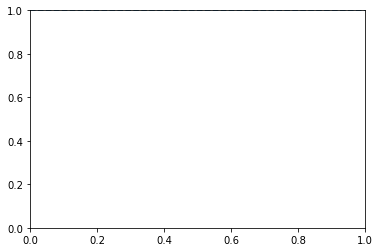

In [10]:
# ==> Plot t(s) again

# Draw the t(s) = 1 line for illustration
plt.axhline(1, linestyle='--');

# ==> Now compute the s values for which t(s)=1, which will give the endpoints of the confidence intervals
#     You can use the function scipy.optimize.root_scalar(func, bracket=(lo, hi)).root
#     which returns the root of the function 'func' over the interval (lo, hi)
#     Note that lambda s : t_s(s) - 1 can be used to define an appropriate 'func' in our case

This defines a type of confidence intervals called *likelihood intervals* which are not quite exact in the non-Gaussian case but are an excellent approximation to the exact solution. This is because some non-Gaussian effects are accounted for in the expression of $t(s)$, which here uses a Poisson expression, so this is a better approximation than just assuming that everything is Gaussian. This type of technique is usually referred to as an *asymptotic approximation*, and we'll see a similar example below for the limits.

## 2.  Limit-setting using likelihoods

Measuring the siAsgnal is useful when it is large, but when it is very small it can be more interesting to set an upper limit on it. This means computing the value of the signal yield that is large enough to be excluded with a given confidence level, typically 95%.

This "95%" means that if we would repeat the experiment many times, the true signal would be below the limit 95% of the time.  This is represented in the picture below, with the shaded area corresponding to 5% of the integral.

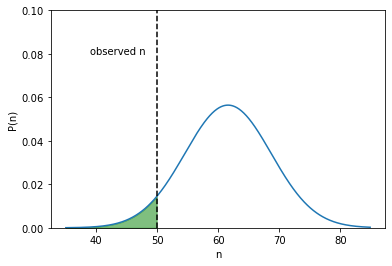

In [22]:
n = 50
sigma = np.sqrt(n)
ns = np.arange(35,85,0.1)
plt.plot(ns, scipy.stats.norm.pdf(ns, loc=n + 1.64*sigma, scale=sigma))
plt.ylim(0,0.1)
plt.xlabel('n')
plt.ylabel('P(n)')

up = 1
shaded_ns = np.arange(35, n, 0.1)
plt.fill_between(shaded_ns, scipy.stats.norm.pdf(shaded_ns, loc=n + 1.64*sigma, scale=sigma), alpha=0.5, color='g')
#plt.axvline(x=n + 1.64*sigma, linestyle='--', color='k')
plt.axvline(x=n, linestyle='--', color='k')
#plt.text(n + 1.64*sigma + 2, 0.08, 's95 + b')
plt.text(n - 11, 0.08, 'observed n');

As it says above, the upper limits is about $1.64\sigma$ above the observed value, in the Gaussian case. Can you compute this number exactly ?

In [25]:
# Use scipy.stats.norm.isf(0.05), the inverse of the survival function

Now let's apply limit-setting on the same multi-bin example we already used for interval estimation above. This is justified here, since from the previous section we know the signal is not large -- setting an upper limit makes sense in this situation.

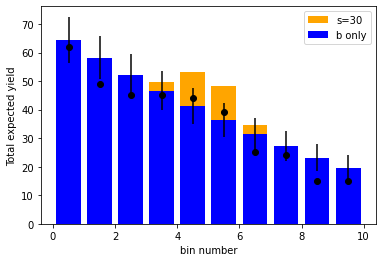

In [26]:
# Plot the model again, for s=30
plt.bar(x, s30_and_b, color='orange', label='s=30')
plt.bar(x, b_only, color='b', yerr=np.sqrt(b_only), label='b only')
plt.scatter(x, data, zorder=10, color='k')
plt.xlabel('bin number')
plt.ylabel('Total expected yield')
plt.legend();

As usual, we use the likelihood-based discriminant
$$
t(s)  = -2 \log \frac{L(s)}{L(\hat{s})}
$$

The only difference compared to parameter measurement is that we will only consider the positive side of the distribution, $s > \hat{s}$, since we are looking for an *upper* limit. 

As we saw before, for the Gaussian case we have
$$
t(s) = \left(\frac{s - \hat{s}}{\sigma_s}\right)^2
$$
so that the limit is reached for $t(s) = 1.64^2$, where $\Phi\left(\sqrt{t(s)}\right) = 0.05$

As for the intervals, we will assume that the relation above is always valid (even if of course our model is not exactly Gaussian). So we will define our limit $s_{95}$ as  $\Phi\left(\sqrt{t(s_{95})}\right) = 0.05$. Remember, this still accounts for non-Gaussianity through the expression of $t(s)$, and usually provides an excellent approximation to the true limit. As for the intervals, this is referred to as the *asymptotic* approximation.

In [14]:
s_vals = np.linspace(10, 50, 100)
# ==> plot Phi(sqrt(t_s)) for the values of s above
# ==> Find the crossing of the curve above with 0.05, using root_scalar as for the intervals. This defines the 95% CL limit